---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
def answer_one():
    fraud_data = pd.read_csv("fraud_data.csv")
    fraud_percent = fraud_data["Class"].value_counts()[1]/len(fraud_data["Class"])
    
    
    return fraud_percent

answer_one()

0.016410823768035772

In [3]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
16629,0.866892,-0.899856,0.971690,0.131152,-0.931563,0.906297,-0.806258,0.485835,1.017235,-0.405591,...,0.055604,-0.066068,-0.177038,0.038159,-0.211134,-0.102590,0.974237,-0.029268,0.015414,119.21
19225,-2.443959,-3.320793,1.038459,-0.593688,-3.925352,2.008374,2.053072,-0.378888,-2.196404,0.585541,...,0.206560,-0.285980,-0.172471,0.600713,0.056783,0.298285,-0.050735,0.385018,0.031201,992.42
8754,2.066008,0.212734,-1.676676,0.407158,0.510979,-0.790015,0.228000,-0.259960,0.363376,-0.411215,...,-0.109995,-0.347788,-0.847449,0.339762,0.531585,-0.247659,0.172542,-0.053897,-0.029045,1.29
1524,2.071216,-0.956856,-0.889735,-0.524264,-0.776255,-0.324803,-0.731801,-0.041067,-0.342191,1.021587,...,-0.540049,-0.330418,-0.440544,0.205605,-0.502165,-0.365702,0.566753,-0.044129,-0.061905,39.80
4330,-1.440668,0.041710,0.610007,-2.820097,-1.664394,-0.877558,-0.884012,0.786296,-1.961644,0.528843,...,-0.308033,-0.319893,-0.610358,0.215085,-0.015094,-0.377717,-0.573045,0.309037,0.067352,42.46


### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [4]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score, accuracy_score
    from sklearn.metrics import classification_report
    
    dummy_majority = DummyClassifier(strategy = "most_frequent").fit(X_train, y_train)
    test_predicted = dummy_majority.predict(X_test)
    
    accu_score = accuracy_score(y_test, test_predicted)
    reca_score = recall_score(y_test, test_predicted)
    
    print(classification_report(y_test, test_predicted))
    
    return (accu_score, reca_score)
    
    
   

answer_two()

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5344
           1       0.00      0.00      0.00        80

    accuracy                           0.99      5424
   macro avg       0.49      0.50      0.50      5424
weighted avg       0.97      0.99      0.98      5424



/Users/guoxiaoshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [5]:
def answer_three():
    from sklearn.metrics import accuracy_score, recall_score, precision_score
    from sklearn.svm import SVC
    
    svm = SVC(kernel='rbf').fit(X_train, y_train)
    test_predict = svm.predict(X_test)
    
    acc_score = accuracy_score(y_test, test_predict)
    rec_score = recall_score(y_test, test_predict)
    prec_score = precision_score(y_test, test_predict)
    
    return (acc_score, rec_score, prec_score)
answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [6]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    
    svm = SVC(C = 1e9, gamma = 1e-07).fit(X_train, y_train)
    test_predict = svm.decision_function(X_test) > -220
    
    # return test_predict, y_test
    return confusion_matrix(y_test, test_predict)
    
    

answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

/Users/guoxiaoshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<IPython.core.display.Javascript object>


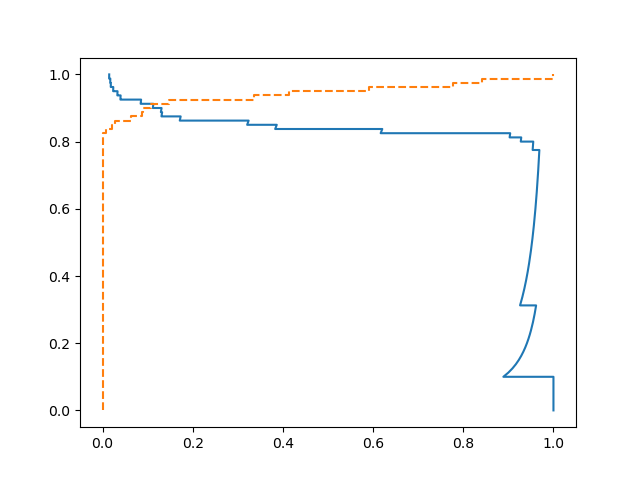

(0.825, 0.9125)

In [7]:
def answer_five():
    
    %matplotlib notebook
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve, auc
     
    logis = LogisticRegression().fit(X_train, y_train) 
    test_score = logis.decision_function(X_test)
    
    precision, recall, thresholds = precision_recall_curve(y_test, test_score)
    
    fpr_lr, tpr_lr, _ = roc_curve(y_test, test_score)
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    
    
    plt.figure()
    plt.plot(precision,recall, ls ="solid")
    plt.plot(fpr_lr,tpr_lr, ls = "--")
    
   
    return (recall[np.argmin(abs(precision - 0.75))], tpr_lr[np.argmin((abs(fpr_lr - 0.16)))])
   

    
    

answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [8]:
def answer_six():
    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import cross_val_score
    
    grid_values = {'C':[0.01, 0.1, 1, 10, 100],'penalty': ['l1', 'l2']}
    
    logis = LogisticRegression()
    
    
    lr_custom = GridSearchCV(logis, param_grid = grid_values, scoring = "recall", cv =3)
    lr_custom.fit(X_train, y_train)
    
    lr_custom.cv_results_.keys() # check the keys of lr_custom.cv_results_
    
    

    return lr_custom.cv_results_['mean_test_score'].reshape(5,2)

answer_six()

/Users/guoxiaoshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/guoxiaoshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/guoxiaoshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/guoxiaoshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/

/Users/guoxiaoshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/guoxiaoshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

array([[       nan, 0.79347826],
       [       nan, 0.80797101],
       [       nan, 0.80072464],
       [       nan, 0.80434783],
       [       nan, 0.80072464]])

In [9]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    

# GridSearch_Heatmap(answer_six())